<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito

Para uma instituição financeira, avaliar se um cliente cumprirá com suas obrigações financeiras é algo importante e ao mesmo tempo muito dificil.
Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de default.

Default é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).


<p align=center>
  <img src="https://ddif61068scye.cloudfront.net/cdn/11/images/20150310174527faepce.jpg" height="300px">
</p>

# Análise Exploratória

In [0]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar dataset
sns.set_style('dark')

In [0]:
# Importar dataset
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

In [0]:
# Tamanho do dataset
print("Variáveis: {}\nEntradas: {}\n\n".format(df.shape[1], df.shape[0]))

# Primeiras 5 entradas
df.head()

Variáveis: 43
Entradas: 45000




,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Olhando para os dados conseguimos identificar que temos entradas criptografadas, e muitos valores Nan, o que nos leva a ter que realizar um trabalho de tratamento no dataset.

**Dicionário de Variáveis**

**ids** - ID do cliente

**target_default** - A variável alvo para analisar o risco de default (inadimplência)

**score_1** - Score 1, codificado

**score_2** - Score 2, codificado

**score_3** - Score 3, valor numérico

**score_4** - Score 4, valor numérico

**score_5** - Score 5, valor numérico

**score_6** - Score 6, valor numérico

**risk_rate** - Taxa de risco

**last_amount_borrowed** - Último montante emprestado, valores NaN representam que cliente nunca pegou emprestimo, ou falta de dados

**last_borrowed_in_months** - Meses do ultimo empréstimo

**credit_limit** - Limite de crédito

**reason** - Informações codificadas

**income** - Renda do cliente

**facebook_profile** - Informações se o cliente tem Facebook

**state** - Estado, informação codificada

**zip** - Informações codificadas

**channel** - Informações codificadas

**job_name** - Informações codificadas

**real_state** - Informações codificadas

**ok_since** - Não identificado

**n_bankruptcies** - Não identificado

**n_defaulted_loans** - Quantidade de empréstimos inadimplentes

**n_accounts** - Numero de contas

**n_issues** - Não identificado

**application_time_applied** - Tempo de aplicação

**application_time_in_funnel** - Tempo de aplicação no funil
email - Servidor do e- mail do cliente

**external_data_provider_credit_checks_last_2_year** - Verificações de crédito de provedor de dados externos nos últimos 2 anos

**external_data_provider_credit_checks_last_month** - Verificações de crédito de provedor de dados externo no mês passado

**external_data_provider_credit_checks_last_year** - Verificações de crédito de provedor de dados externos no ano passado

**external_data_provider_email_seen_before** - Email do provedor de dados externo visto antes

**external_data_provider_first_name** - Primeiro nome do provedor de dados externo 

**external_data_provider_fraud_score** - Pontuação de fraude do provedor de dados externo

**lat_lon** - Latitude e Longitude

**marketing_channel** - Canal de marketing

**profile_phone_number** - Número de telefone do perfil

**reported_income** - Renda reportada

**shipping_state** - Estado de envio

**shipping_zip_code** - Código postal de envio

**profile_tags** - Tags de perfil  (contém um dicionário com tags atribuídas a cada cliente, aparentemente)

**user_agent** - Agente de usuário

**target_fraud** - Fraude alvo (seria a variável alvo de outro modelo para este mesmo dataset, onde o objetivo seria a detecção de fraude.)

In [0]:
# Resumo estatístico dos dados
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Identificamos na variável "*external_data_provider_email_seen_before*" um valor negativo de -999, em "*reported_income*" valores NaN e inf, valores outliers em *last_amount_borrowed*, *credit_limit*, e *ok_since*.

In [0]:
# Verificar valores nulos no dataset
n = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
df_n = pd.DataFrame(n)
df_n.style.format(" {:.2%}")

,0
target_fraud,96.62%
last_amount_borrowed,66.57%
last_borrowed_in_months,66.57%
ok_since,58.99%
external_data_provider_credit_checks_last_2_year,50.28%
external_data_provider_credit_checks_last_year,33.61%
credit_limit,30.67%
n_issues,25.65%
facebook_profile,9.91%
marketing_channel,7.95%


O dataset apresenta 5 variáveis com mais de 50% de suas entradas ausentes.

In [0]:
# Tipo das variáveis
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

# Transformação dos dados

Após analisar cada variável, conseguimos identificar algumas que poderemos excluir por principalmente não conseguir obter mais informações para tratá-las de uma forma melhor e trataremos valores Nan e inf.


In [0]:
#Criar cópia do dataset
df_clean = df.copy()

#Transformar valores inf da variável reported_income em NaN
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,np.nan)

#Excluir variáveis identificadas na análise como sem informação aparente ou que demandam mais pesquisa
df_clean.drop(labels=['ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year', 'channel', 'reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags','application_time_applied', 'email', 'marketing_channel', 'profile_phone_number', 'shipping_state'], axis=1, inplace=True)

#Alterar valor -999  para Nan da variável external_data_provider_email_seen_before
df_clean.loc[df['external_data_provider_email_seen_before'] == -999.0, 'external_data_provider_email_seen_before'] = np.nan

#Elminar as entradas onde target_default é NaN
df_clean.dropna(subset=['target_default'], inplace=True)


Para as variáveis:

last_amount_borrowed - valores Nan tratarei como 0, pois, se não existe valor o cliente não apresenta anteriormente valores de emprestimos

last_borrowed_in_months - significa meses do ultimo emprestimo, considero Nan como 0

external_data_provider_credit_checks_last_year - verificações de crédito no ultimo ano, valores Nan, considero como 0

credit_limit - também vou considerar os valores nulos como 0, ou seja, o cliente não tem limite de crédito estipulado

In [0]:
#Tratamento das variáveis com valores ausentes

df_clean.last_amount_borrowed.fillna(0, inplace=True)
df_clean.last_borrowed_in_months.fillna(0, inplace=True)
df_clean.external_data_provider_credit_checks_last_year.fillna(0,inplace=True)
df_clean.credit_limit.fillna(0, inplace=True)

Das variáveis restantes, usaremos a Biblioteca Simple Imputer em SimpleImputer para realizar o preenchimento dos valores ausentes, dividindo o dataset entra variáveis numéricas e categoricas:

**Numéricas:** (strategy=mean)


credit_limit

n_issues

external_data_provider_email_seen_before

n_bankruptcies

reported_income

n_defaulted_loans



**Categoricas:** (strategy=most_frequent)


facebook_profile

marketing_channel

job_name

user_agent


In [0]:
# Biblioteca para preenchimento de valores ausentes
from sklearn.impute import SimpleImputer

# Dividir variáveis do dataset entre categoricas e numericas
num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# Imput de valores em variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:, num_df])

# Imput de valores em variáveis categoricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:, cat_df])

In [0]:
#Verificar valores ausentes no dataset 
print((df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False))

reported_income                                    0.0
external_data_provider_fraud_score                 0.0
score_1                                            0.0
score_2                                            0.0
score_3                                            0.0
score_4                                            0.0
score_5                                            0.0
score_6                                            0.0
risk_rate                                          0.0
last_amount_borrowed                               0.0
last_borrowed_in_months                            0.0
credit_limit                                       0.0
income                                             0.0
facebook_profile                                   0.0
state                                              0.0
real_state                                         0.0
ok_since                                           0.0
n_bankruptcies                                     0.0
n_defaulte

Após realizarmos a o preenchimento de valores ausentes nas variáveis, iremos normalizar os dados de valores numéricos, utilizando StandardScaler, onde o conceito é **Conjunto de dados = (Conjunto de dados - Média) / Desvio Padrão**

In [0]:
# Importar biblioteca
from sklearn.preprocessing import StandardScaler

# Criar cópia do dataframe
df_2 = df_clean.copy()

# Eliminar coluna target_default e demais variáveis string
num_cols = df_2.drop('target_default', axis=1).select_dtypes(exclude='object').columns

# Passar método StandardScaler
df_2[num_cols] = StandardScaler().fit_transform(df_2[num_cols].values)

Classificaremos as variáveis com seu tipo *object*, com Label Encoding em variáveis do tipo numéricas, como por exemplo, Ruim , Médio, Bom, onde: Ruim = 1, Médio = 2 e Bom = 3

In [0]:
# Importar biblioteca
from sklearn.preprocessing import LabelEncoder

# Criar cópia do dataframe
encoded_df = df_2.copy()

# Eliminar variáveis numéricas
cat_col = encoded_df.select_dtypes('object').columns

# Passar método LabelEncoder
for col in cat_col:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

# Divisão do dataset

Dividir dataset entre treino e teste utilizando train_test_split para treinarmos os modelos de Machine Learning

In [0]:
# Importar biblioteca
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes da variável alvo
X = encoded_df.drop('target_default', axis=1) 
y = encoded_df.target_default

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Preparação, treinamendo e predição do modelo de Machine Learning 1 - Regressão Logística da Biblioteca sklearn

In [0]:
# Importanto bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [0]:
# Treinar modelo de Machine Learning
ml_model = LogisticRegression()

ml_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Após o modelo treinado iremos realizar previsões e analisar as métricas, se for o caso, faremos alterações em nosso modelo.

In [0]:
#Previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)

# ver performance do algoritmo
print('Performance: {}'.format(accuracy_score(y_test, y_pred)))

Performance: 0.8418934457646607


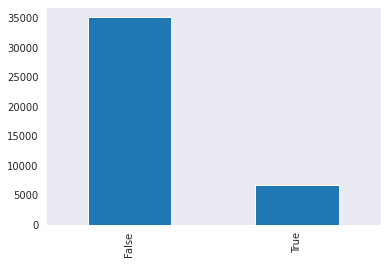

In [0]:
encoded_df.target_default.value_counts().plot(kind='bar');

Conseguimos uma performance de 84,18% em um conjunto de dados sem muita informação, como visto no gráfico acima, nosso dataset está totalmente desbalanceado, e com certeza temos uma melhor precisão em target_default com False.

In [0]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       False     0.8430    0.9983    0.9141      8791
        True     0.4000    0.0061    0.0120      1645

    accuracy                         0.8419     10436
   macro avg     0.6215    0.5022    0.4630     10436
weighted avg     0.7731    0.8419    0.7719     10436



Conforme citado acima, podemos comprovar que temos o dobro de performance de False.

Faremos um teste balanceando os dados e aplicando mais de um modelo.

# Balanceando os dados

In [0]:
#Importar Bibliotecas
from imblearn.under_sampling import RandomUnderSampler;
# usar técnica under-sampling para balancear os dados, nesta técnica iremos manter nossos dados de minoria, e iremos colher a mesma quantidade de dados da maioria
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


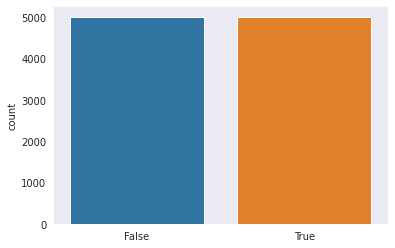

In [0]:
# plotar a nova distribuição de classes
sns.countplot(y_rus);

# Preparação, treinamendo e predição do modelo de Machine Learning 2 - Regressão Logística da Biblioteca sklearn

In [0]:
# Treinar modelo de Machine Learning com dados balanceados
ml_model1 = LogisticRegression(dual=False, max_iter=150, multi_class='auto')

ml_model1.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Ao treinar o modelo identificamos uma valha ao convergir resultados True.

In [0]:
# Previsões e probabilidades em cima do dataset de teste
yb_pred = ml_model1.predict(X_test)

# ver performance do algoritmo
print('Performance: {}'.format(accuracy_score(y_test, yb_pred)))

Performance: 0.6268685320045995


In [0]:
# Análise da performance do algoritimo
print(classification_report(y_test, yb_pred, digits=4))

              precision    recall  f1-score   support

       False     0.8921    0.6337    0.7410      8791
        True     0.2317    0.5903    0.3328      1645

    accuracy                         0.6269     10436
   macro avg     0.5619    0.6120    0.5369     10436
weighted avg     0.7880    0.6269    0.6767     10436



# Preparação, treinamendo e predição do modelo de Machine Learning 3 - Decision Tree classifier da Biblioteca sklearn

Ao testar novamenta com outro algoritimo de machine learning, quero entender o motivo da baixa performance, do algoritimo anterior com os dados balanceados.

In [0]:
# criar e treinar um modelo de Regressão Linear
from sklearn.tree import DecisionTreeClassifier

In [0]:
# criar e treinar um modelo de Regressão Linear
dt_model = DecisionTreeClassifier(max_depth=7, criterion="entropy", splitter='best')
dt_model.fit(X_rus, y_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# previsões e probabilidades em cima do dataset de teste
yd_pred = dt_model.predict(X_test)

# ver performance do algoritmo
print("\nAccuracy Score:")
print (accuracy_score(y_test, yd_pred))


Accuracy Score:
0.6278267535454197


In [0]:
#Análise da performance do algoritimo
print(classification_report(y_test, yd_pred, digits=4))

              precision    recall  f1-score   support

       False     0.9000    0.6279    0.7397      8791
        True     0.2398    0.6274    0.3470      1645

    accuracy                         0.6278     10436
   macro avg     0.5699    0.6276    0.5434     10436
weighted avg     0.7960    0.6278    0.6778     10436



# Preparação, treinamendo e predição do modelo de Machine Learning 3 - XGBClassifier da biblioteca Xgboost 

In [0]:
#Criar cópia dos datasets

#Cópia para Target Default = True
df_testetrue = encoded_df.copy()

#Cópia para Target Default = False
df_testefalse = encoded_df.copy()

In [0]:
#Dividir dataset para Target Default = True 
df_testetrue = df_testetrue.loc[df_testetrue['target_default'] == True]
#Dividir dataset para Target Default = False
df_testefalse = df_testefalse.loc[df_testefalse['target_default'] == False]

In [0]:
#Contagem de valores True no dataset
print("Contagem de entradas True: {}".format((df_testetrue['target_default'].value_counts())));
#Contagem de valores False no dataset
print("Contagem de entradas False: {}".format(df_testefalse['target_default'].value_counts()));

Contagem de entradas True: True    6661
Name: target_default, dtype: int64
Contagem de entradas False: False    35080
Name: target_default, dtype: int64


Iremos excluindo entradas em *df_testefalse* ou aumentando as entradas de acordo com a performance do algoritimo.

In [0]:
#Escolhendo aleatóriamente entradas False
df_testefalse = df_testefalse.sample(20000)

#Agrupando o Datagrame df_testetrue e df_testefalse
new_df = pd.concat([df_testefalse, df_testetrue])

print('Entradas no dataset: {}'.format(new_df.shape[0]))

Entradas no dataset: 26661


In [0]:
from xgboost import XGBClassifier

In [0]:
# separar as variáveis independentes da variável alvo
X = new_df.drop('target_default', axis=1)
y = new_df.target_default 

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
# instanciando o modelo e treinando o mesmo
ml_model = XGBClassifier(learning_rate=0.02, n_estimators=1100, max_depth=3, subsample = 0.7, colsample_bytree = 1, gamma=10, random_state=10)

ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [0]:
# previsões e probabilidades em cima do dataset de teste
y_predx = ml_model.predict(X_test)

# ver performance do algoritmo
print("\nAccuracy Score:")
print (accuracy_score(y_test, y_predx))
print(classification_report(y_test, y_predx, digits=4))



Accuracy Score:
0.7593759375937594
              precision    recall  f1-score   support

       False     0.7671    0.9696    0.8566      4939
        True     0.6454    0.1581    0.2540      1727

    accuracy                         0.7594      6666
   macro avg     0.7062    0.5639    0.5553      6666
weighted avg     0.7356    0.7594    0.7004      6666



# Conclusão

**Modelo de Machine Learning 1** - Regressão Logística da Biblioteca sklearn - Com os dados desbalanceados com uma representação de aproximados 5000 True e 35000 False, tivemos uma performance geral de 84,19%, porém analisando a precisão para True, tivemos somente 40%.

Após as análises acima realizei o balanceamento dos dados onde obtive os seguinte resultados:

**Modelo de Machine Learning 2** - Regressão Logística da Biblioteca sklearn (Dados balanceados)

Utilizando a técnica de under-sampling para balancear os dados, tivemos entradas aproximadas de 5000 para False e 5000 para True, nossa performance geral caiu para 62,69%, nossa precisão para False subiu para 89%, porém a precisão para True caiu para 23,60%.

**Modelo de Machine Learning 3**
Realizamos uma terceira tentativa com Arvore de Decisão da biblioteca Slearn, com os dados balanceados

Tivemos uma performance geral de 62,78% e praticamente mantivemos os números do segundo algoritimo que testamos

**Modelo de Machine Learning 4**
Para finalizar, utilizei a biblioteca XGBoost

Tive problemas para utilizar os dados balanceados da forma que a biblioteca imblearn.under_sampling me trouxe os dados, então utilizando python e pandas dividi o conjunto de dados entre True e False, desta forma podia controlar a quantidade de entradas False iria incluir e analisar a performance.

In [0]:
df_result = {
    'Entradas False' : [6661, 15000, 20000, 25000, 35080],
    'Performance Geral' : [0.6605, 0.7291, 0.7609, 0.7955, 0.8380],
    'Precisão para True' : [0.6550, 0.6507, 0.6497, 0.6331, 0.5873],
    'Precisão para False' : [0.6661, 0.7390, 0.7675, 0.8021, 0.8410],
}

df_result = pd.DataFrame(df_result)

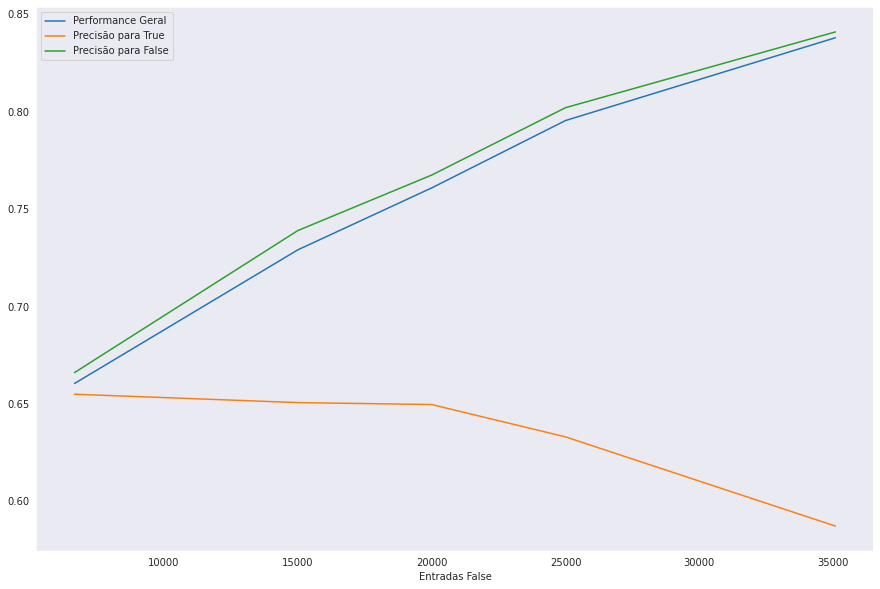

In [0]:
#Plotar figure
fig, ax = plt.subplots(figsize=(15,10))

#Plotar gráfico
df_result.plot('Entradas False', ax=ax);

Analisando o gráfico temos a precisão para False crescente conforme temos um aumento na quantidade de dados, junto com a precisão geral, na precisão para True, como temos uma menor quantidade de dados, a partir de 20000 entradas de False para 6661 de True, temos uma grande queda de performance.

Conclui que para conseguir uma melhor performance neste algotirimo necessitaríamos de mais dados, principalmente com resultados True.